In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import matplotlib.animation
from IPython.display import HTML
import japanize_matplotlib

ModuleNotFoundError: No module named 'japanize_matplotlib'

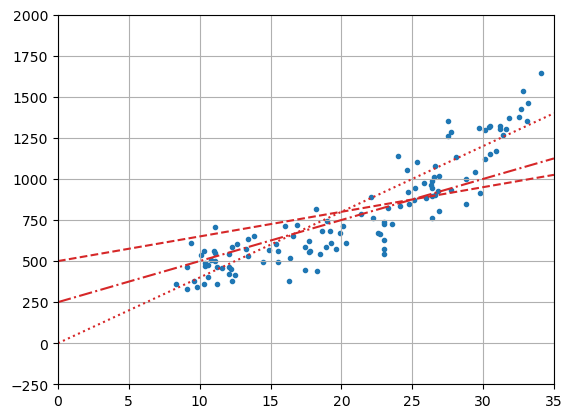

In [8]:
X = np.array([
     9.1, 11.2, 12.3, 18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3,
    11.1,  8.3,  9.1, 12.5, 18.5, 23.6, 24.8, 30.1, 33.1, 29.8, 23. ,
    16.3, 11.2,  9.6, 10.3, 16.4, 19.2, 24.1, 26.5, 31.4, 33.2, 28.8,
    23. , 17.4, 12.1, 10.6,  9.8, 14.5, 19.6, 24.7, 26.9, 30.5, 31.2,
    26.9, 23. , 17.4, 11. , 10.4, 10.4, 15.5, 19.3, 26.4, 26.4, 30.1,
    30.5, 26.4, 22.7, 17.8, 13.4, 10.6, 12.2, 14.9, 20.3, 25.2, 26.3,
    29.7, 31.6, 27.7, 22.6, 15.5, 13.8, 10.8, 12.1, 13.4, 19.9, 25.1,
    26.4, 31.8, 30.4, 26.8, 20.1, 16.6, 11.1,  9.4, 10.1, 16.9, 22.1,
    24.6, 26.6, 32.7, 32.5, 26.6, 23. , 17.7, 12.1, 10.3, 11.6, 15.4,
    19. , 25.3, 25.8, 27.5, 32.8, 29.4, 23.3, 17.7, 12.6, 11.1, 13.3,
    16. , 18.2, 24. , 27.5, 27.7, 34.1, 28.1, 21.4, 18.6, 12.3])

Y = np.array([
    463.,  360.,  380.,  584.,  763.,  886., 1168., 1325.,  847.,
    542.,  441.,  499.,  363.,  327.,  414.,  545.,  726.,  847.,
   1122., 1355.,  916.,  571.,  377.,  465.,  377.,  362.,  518.,
    683.,  838., 1012., 1267., 1464., 1000.,  629.,  448.,  466.,
    404.,  343.,  493.,  575.,  921., 1019., 1149., 1303.,  805.,
    739.,  587.,  561.,  486.,  470.,  564.,  609.,  899.,  946.,
   1295., 1325.,  760.,  667.,  564.,  633.,  478.,  450.,  567.,
    611.,  947.,  962., 1309., 1307.,  930.,  668.,  496.,  650.,
    506.,  423.,  531.,  672.,  871.,  986., 1368., 1319.,  924.,
    716.,  651.,  708.,  609.,  535.,  717.,  890., 1054., 1077.,
   1425., 1378.,  900.,  725.,  554.,  542.,  561.,  459.,  604.,
    745., 1105.,  973., 1263., 1533., 1044.,  821.,  621.,  601.,
    549.,  572.,  711.,  819., 1141., 1350., 1285., 1643., 1133.,
    784.,  682.,  587.])

icecream_data = (X, Y)

X = np.array([0, 35])
fig, ax = plt.subplots(dpi=100)
ax.scatter(icecream_data[0], icecream_data[1], marker='.')
ax.plot(X, 15 * X + 500, ls='--', color='tab:red')
ax.plot(X, 25 * X + 250, ls='-.', color='tab:red')
ax.plot(X, 40 * X + 0, ls='dotted', color='tab:red')
# ax.text(1, 1550, 'データをよく反映する直線をどのように求めればよいか？', color='tab:red')
# ax.set_title('最高気温とアイスクリーム・シャーベットの支出額')
# ax.set_xlabel('最高気温の月平均（℃）')
# ax.set_ylabel('支出額（円）')
ax.set_xlim(0, 35)
ax.set_ylim(-250, 2000)
ax.grid()
plt.show()

In [9]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

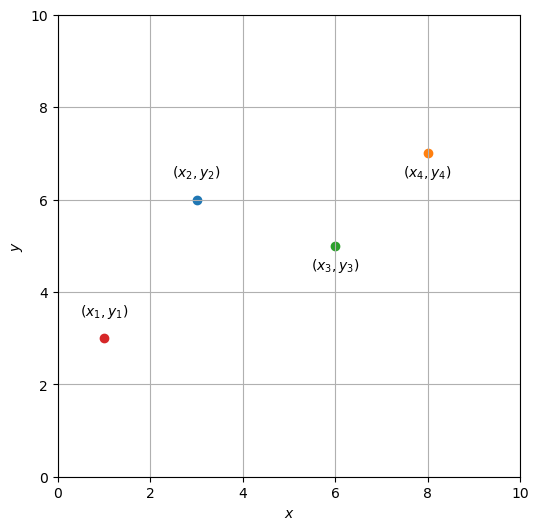

In [10]:
colormap = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
offset_y = [0.5, 0.5, -0.5, -0.5]
xmin, xmax = 0, 10
ymin, ymax = 0, 10

def init_graph(dpi=100, grid=True):
    fig, ax = plt.subplots(dpi=dpi, figsize=(6, 6))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect('equal')
    if grid:
        ax.grid()
    return fig, ax

def plot_data(ax, D, offset_y=None, marker='o'):
    A = []
    for i, row in enumerate(D):
        A.append(ax.scatter(D[i,0], D[i,1], marker=marker, color=colormap[i]))
        if offset_y is not None:
            A.append(ax.text(D[i,0], D[i,1] + offset_y[i], f'$(x_{i+1}, y_{i+1})$', ha='center'))
    return A

fig, ax = init_graph()
plot_data(ax, D, offset_y)
plt.show()

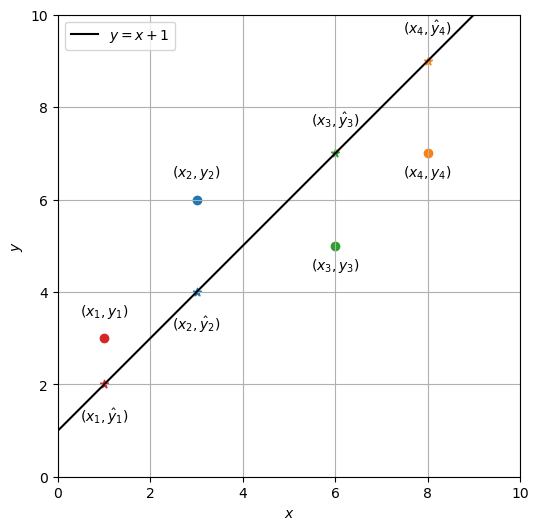

In [11]:
offset_hat_y = [-0.8, -0.8, 0.6, 0.6]

def plot_line(ax, a, b, label=None, color='black', alpha=1.):
    if label is None:
        label = f'$y = {a}x + {b}$' if a != 1 else f'$y = x + {b}$'
    x = np.array([xmin, xmax])
    return ax.plot(x, a * x + b, color, ls='-', label=label, alpha=alpha)

def plot_hat_y(ax, D, a, b, offset_hat_y, marker='*', show_text=True):
    A = []
    for i, row in enumerate(D):
        x = D[i,0]
        hat_y = a * x + b
        A.append(ax.scatter(x, hat_y, marker=marker, color=colormap[i]))
        if show_text:
            A.append(ax.text(x, hat_y + offset_hat_y[i], f'$(x_{i+1}, \\hat{{y}}_{i+1})$', ha='center'))
    return A

fig, ax = init_graph()
plot_data(ax, D, offset_y)
plot_line(ax, 1, 1)
plot_hat_y(ax, D, 1, 1, offset_hat_y)
plt.legend(loc='upper left')
plt.show()

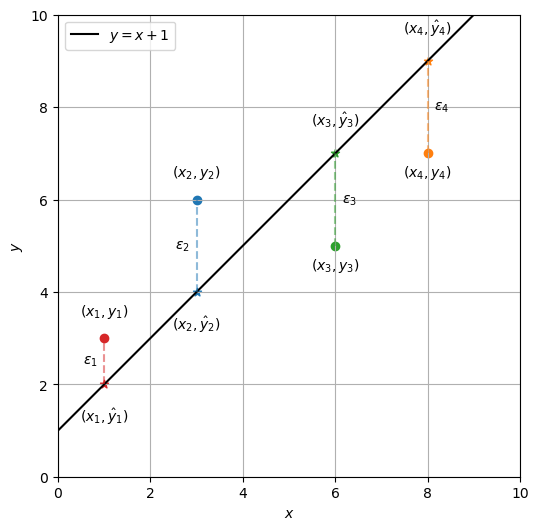

In [12]:
offset_epsilon = [-0.3, -0.3, 0.3, 0.3]

def plot_error(plt, ax, D, a, b, offset_epsilon=None):
    A = []
    for i, row in enumerate(D):
        x, y = row
        y_hat = a * x + b
        ymin = min(y, y_hat)
        ymax = max(y, y_hat)
        A.append(plt.vlines([x], ymin, ymax, linestyles='dashed', color=colormap[i], alpha=0.5))
        if offset_epsilon is not None:
            A.append(ax.text(x + offset_epsilon[i], (ymin + ymax) / 2, f'$\epsilon_{i+1}$', ha='center', va='center'))
    return A

fig, ax = init_graph()
plot_data(ax, D, offset_y)
plot_line(ax, 1, 1)
plot_hat_y(ax, D, 1, 1, offset_hat_y)
plot_error(plt, ax, D, 1, 1, offset_epsilon)
plt.legend(loc='upper left')
plt.show()

In [13]:
def generate_parameter(L = 1000, xwidth=10, ymin=0, ymax=10):
    A = np.random.rand(L)
    B = np.random.rand(L) * (ymax - ymin) + ymin
    for i, b in np.ndenumerate(B):
        amax = (ymax - b) / xwidth
        amin = (ymin - b) / xwidth
        A[i] = np.random.rand() * (amax - amin) + amin
    return np.column_stack((A, B))

K = 5
np.random.seed(seed=5)
P = generate_parameter(100)

fig, ax = init_graph(grid=False)
plot_data(ax, D)

best = (None, None, None, None)
artists = []
for i in range(len(P)+K):
    # Update the best parameter if necessary.
    if i < len(P):
        a, b = P[i][0], P[i][1]
        msr = ((D[:,1] - a * D[:,0] - b) ** 2).mean()
        if best[0] is None or msr < best[1]:
            best = (i, msr, a, b)

    artist = []
    msg_current = ''

    # Draw the current best line.
    artist += plot_line(ax, best[2], best[3], color='tab:red')
    msg_best = "(Current best: $a$ = {0[2]:.2f}, $b$ = {0[3]:.1f}: MSR = ${0[1]:.2f}$)".format(best)
    
    # Draw recent lines.
    for k in range(K):
        j = i-k
        if j < 0 or len(P) <= j:
            continue
        
        if j != best[0]:
            a, b = P[j][0], P[j][1]
            artist += plot_line(ax, a, b, color='black', alpha=1.0 / (k+1))
        
        if k == 0:
            artist += plot_hat_y(ax, D, a, b, offset_hat_y, show_text=False)
            artist += plot_error(plt, ax, D, a, b)        
            msg_current = f"$a$ = {a:.2f}, $b$ = {b:.1f}: MSR = ${msr:.2f}$"
            
    artist.append(ax.text(5, 0.6, msg_current + '\n' + msg_best, color='tab:red', ha='center'))
    artists.append(artist)

ani = matplotlib.animation.ArtistAnimation(fig, artists, interval=100, repeat=False)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

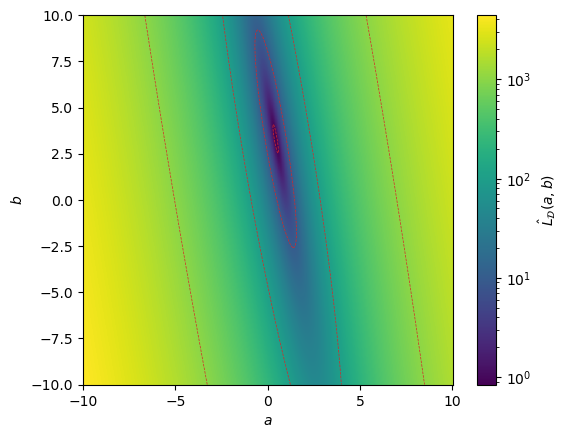

In [14]:
def msr(a, b, D):
    xm = np.mean(D[:,0])
    ym = np.mean(D[:,1])
    x2m = np.mean(D[:,0] ** 2)
    y2m = np.mean(D[:,1] ** 2)
    xym = np.mean(D[:,0] * D[:,1])
    return x2m * (a ** 2) + b ** 2 + 2 * xm * a * b - 2 * xym * a - 2 * ym * b + y2m

N = 1000
A, B = np.meshgrid(np.linspace(-10, 10, N), np.linspace(-10, 10, N))
J = msr(A, B, D)

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$a$')
ax.set_ylabel('$b$')

# Draw a heat map on a logarithmic scale of MSR.
mesh = ax.pcolormesh(A, B, J, norm=matplotlib.colors.LogNorm(vmin=J.min(), vmax=J.max()), shading='auto')
cbar = fig.colorbar(mesh)
cbar.set_label('$\hat{L}_{\mathcal{D}}(a,b)$')

# Draw a contour map (clip loss values not to draw lines in smaller area)
ax.contour(
    A, B, np.clip(J, 1e-3, None), vmin=1, colors='tab:red', linewidths=0.5, linestyles='dashed',
    norm=matplotlib.colors.LogNorm(vmin=J.min(), vmax=J.max()))

plt.show()

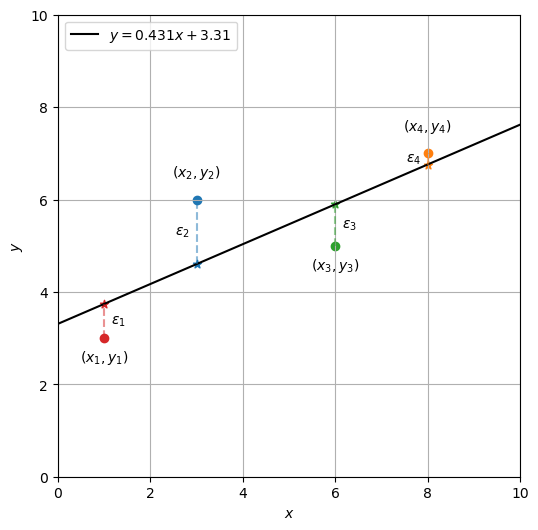

In [15]:
a, b = 0.431, 3.310
offset_y_new = [-0.5, 0.5, -0.5, 0.5]
offset_epsilon_new = [0.3, -0.3, 0.3, -0.3]

fig, ax = init_graph()
plot_data(ax, D, offset_y_new)
plot_line(ax, a, b)
plot_hat_y(ax, D, a, b, offset_hat_y, show_text=False)
plot_error(plt, ax, D, a, b, offset_epsilon_new)
plt.legend(loc='upper left')
plt.show()

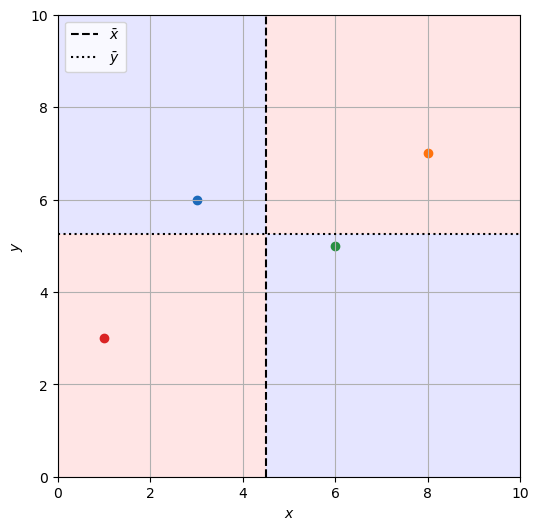

In [16]:
def draw_means(ax, D):
    xm = np.mean(D[:,0])
    ym = np.mean(D[:,1])
    plt.vlines([xm], xmin, xmax, "black", linestyles='dashed', label=r"$\bar{x}$")
    plt.hlines([ym], ymin, ymax, "black", linestyles='dotted', label=r"$\bar{y}$")
    
def draw_regions(ax, D):
    xm = np.mean(D[:,0])
    ym = np.mean(D[:,1])
    ax.add_patch(
         matplotlib.patches.Rectangle((0, 0), xm, ym, facecolor='red', alpha=0.1, fill=True))
    ax.add_patch(
         matplotlib.patches.Rectangle((xm, ym), 10-xm, 10-ym, facecolor='red', alpha=0.1, fill=True))
    ax.add_patch(
         matplotlib.patches.Rectangle((0, ym), xm, ym, facecolor='blue', alpha=0.1, fill=True))
    ax.add_patch(
         matplotlib.patches.Rectangle((xm, 0), 10-xm, ym, facecolor='blue', alpha=0.1, fill=True))

fig, ax = init_graph()
plot_data(ax, D)
draw_means(ax, D)
draw_regions(ax, D)
plt.legend(loc='upper left')
plt.show()

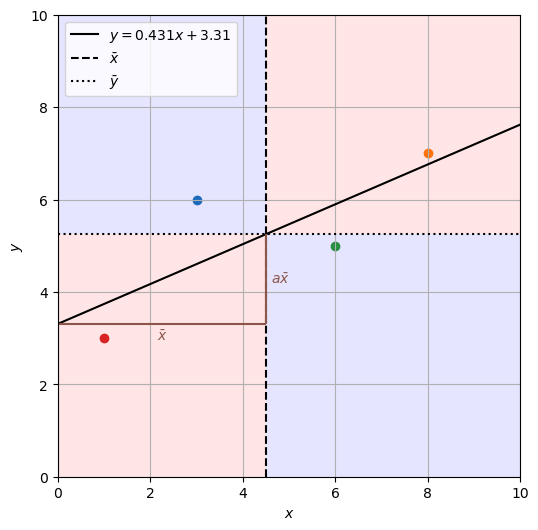

In [17]:
def draw_slope(ax, D, b):
    xm = np.mean(D[:,0])
    ym = np.mean(D[:,1])
    plt.hlines([b], 0, xm, "tab:brown")
    plt.vlines([xm], b, ym, "tab:brown")
    plt.text(xm / 2, b - 0.1, "$\\bar{x}$", color="tab:brown", va='top', ha='center')
    plt.text(xm + 0.1, b + (ym - b) / 2, "$a\\bar{x}$", color="tab:brown", va='center', ha='left')

a, b = 0.431, 3.310
fig, ax = init_graph()
plot_data(ax, D)
plot_line(ax, a, b)
draw_means(ax, D)
draw_regions(ax, D)
draw_slope(ax, D, b)
plt.legend(loc='upper left')
plt.show()

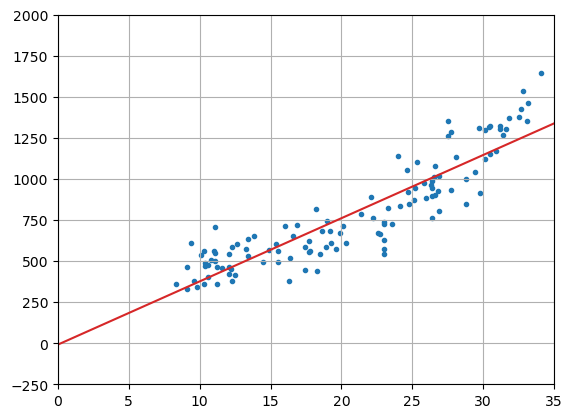

In [22]:
X, Y = icecream_data

def show_graph(X, Y, x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'tab:red')
#     ax.set_title('最高気温とアイスクリーム・シャーベットの支出額')
#     ax.set_xlabel('最高気温の月平均（℃）')
#     ax.set_ylabel('支出額（円）')
    ax.set_xlim(0, 35)
    ax.set_ylim(-250, 2000)
    ax.grid()
    plt.show()

from numpy.polynomial import Polynomial

W = Polynomial.fit(X, Y, 1)
W.convert().coef

x = np.linspace(0, 35, 100)
y_hat = W(x)
show_graph(X, Y, x, y_hat)

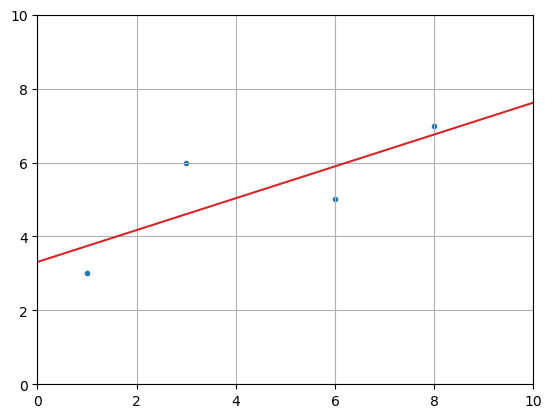

In [34]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = D[:,0]
Y = D[:,1]

xmin, xmax = 0, 10
ymin, ymax = 0, 10

def show_graph(X, Y, x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'tab:red')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.grid()
    plt.show()

W = Polynomial.fit(X, Y, 1)
W.convert().coef

x = np.linspace(0, 10, 100)
y_hat = W(x)
show_graph(X, Y, x, y_hat)

In [35]:
print(W.convert().coef) # y=ax+bの傾きと切片を求める

[3.31034483 0.43103448]
